In [ ]:
"""
`bonferroni` : one-step correction
`sidak` : one-step correction
`holm-sidak` : step down method using Sidak adjustments
`holm` : step-down method using Bonferroni adjustments
`simes-hochberg` : step-up method  (independent)
`hommel` : closed method based on Simes tests (non-negative)
`fdr_bh` : Benjamini/Hochberg  (non-negative)
`fdr_by` : Benjamini/Yekutieli (negative)
`fdr_tsbh` : two stage fdr correction (non-negative)
`fdr_tsbky` : two stage fdr correction (non-negative)
"""
# https://github.com/maximtrp/scikit-posthocs

In [ ]:
### Parametric pairwise multiple comparisons tests:
# Student T test.
# Scheffe test.
# Tamhane T2 test.
# TukeyHSD test.

### Non-parametric tests for factorial design:
# Wilcoxon test.
# Mann-Whitney test.
# Conover test.
# Dunn test.
# Dwass, Steel, Critchlow, and Fligner test.
# Nashimoto and Wright (NPM) test.
# Nemenyi test.
# van Waerden test.

### Non-parametric tests for block design:
# Conover test.
# Durbin and Conover test.
# Miller test.
# Nemenyi test.
# Quade test.
# Siegel test.
# sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')


In [1]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import os

In [2]:
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/danilabobkov/---ExData---/block2_BS/TMRM


In [19]:
df = pd.read_csv('df_median_mean1.csv', sep = ';')

In [20]:
# delete first column
df = df.drop('Unnamed: 0', 1)

/var/folders/d6/rvxyyr_178g48f1nlqq52dlm0000gn/T/ipykernel_21352/3953482045.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


KeyError: "['Unnamed: 0'] not found in axis"

In [21]:
df.head()

,name,zone,red_median,green_median,blue_median,red_mean,green_mean,blue_mean
0,AAA160221,NegativeControl,0.015686,0.0,0.023529,0.041748,0.000756,0.062497
1,AAA160221,NegativeControl,0.019608,0.0,0.003922,0.044422,0.001509,0.022855
2,AAA160221,NegativeControl,0.023529,0.0,0.003922,0.048596,0.001727,0.026450
3,AAA160221,NegativeControl,0.031373,0.0,0.015686,0.043723,0.001046,0.084417
4,AAA160221,NegativeControl,0.019608,0.0,0.011765,0.038088,0.001586,0.055561


In [22]:
cols = df.columns.tolist()
cols

['name',
 'zone',
 'red_median',
 'green_median',
 'blue_median',
 'red_mean',
 'green_mean',
 'blue_mean']

In [23]:
df.groupby('name', sort=False).aggregate({'green_median' : 'mean'})

,green_median
name,
AAA160221,0.000000
AUS300805,0.003922
SVE04081947,0.009009
MVI18021961,0.010022
GNG19101961,0.014528
ANI09041964,0.014322
HTA210412,0.021786
VIR140421,0.019146
LIM22031967,0.016667


In [24]:
sp.posthoc_conover(df, val_col='green_median', group_col='name', p_adjust = 'holm', sort=False)

,AAA160221,AUS300805,SVE04081947,MVI18021961,GNG19101961,ANI09041964,HTA210412,VIR140421,LIM22031967,GEN26011949,GML150219,EAA200917,KAS18052021,SSF210158,GZhE27042021
AAA160221,1.000000e+00,1.000000e+00,1.465199e-02,1.062124e-02,4.128096e-06,7.158056e-06,8.994735e-11,3.493678e-08,9.133784e-06,1.782890e-10,1.131595e-10,9.074450e-12,1.823370e-16,1.718567e-19,1.677549e-34
AUS300805,1.000000e+00,1.000000e+00,8.429136e-01,6.171227e-01,1.453281e-03,1.564887e-03,5.213793e-08,1.640280e-05,1.502638e-03,1.031122e-07,4.959221e-08,6.798759e-09,1.183323e-13,7.582994e-17,5.225947e-33
SVE04081947,1.465199e-02,8.429136e-01,1.000000e+00,1.000000e+00,6.482266e-01,4.384275e-01,8.805698e-05,1.799842e-02,3.067723e-01,1.824942e-04,5.606375e-05,1.631513e-05,1.900341e-10,3.190155e-14,4.212777e-33
MVI18021961,1.062124e-02,6.171227e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.564887e-03,1.374084e-01,8.076422e-01,3.052221e-03,6.967593e-04,8.078677e-04,5.213793e-08,1.479739e-10,8.493433e-27
GNG19101961,4.128096e-06,1.453281e-03,6.482266e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.686967e-01,1.000000e+00,1.000000e+00,3.051454e-01,5.654353e-02,1.477643e-01,2.200706e-05,7.535399e-08,1.635310e-25
ANI09041964,7.158056e-06,1.564887e-03,4.384275e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.381030e-01,1.000000e+00,7.610721e-03,6.967593e-04,3.821590e-16
HTA210412,8.994735e-11,5.213793e-08,8.805698e-05,1.564887e-03,1.686967e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.098612e-01,1.851744e-10
VIR140421,3.493678e-08,1.640280e-05,1.799842e-02,1.374084e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.300353e-02,1.564887e-03,2.359574e-17
LIM22031967,9.133784e-06,1.502638e-03,3.067723e-01,8.076422e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.370307e-01,3.529031e-02,2.412444e-11
GEN26011949,1.782890e-10,1.031122e-07,1.824942e-04,3.052221e-03,3.051454e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.878738e-01,1.120901e-11


In [38]:
# color variant 1 Greeny
#heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, #'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [25]:
# color variant 2 Reddish good
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [42]:
# color variant 3 Gray
#cmap = ['1', '#ffffff',  '#000000',  '#696969', '#c0c0c0']
#heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': True, 'square': #True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x286bc7970>)

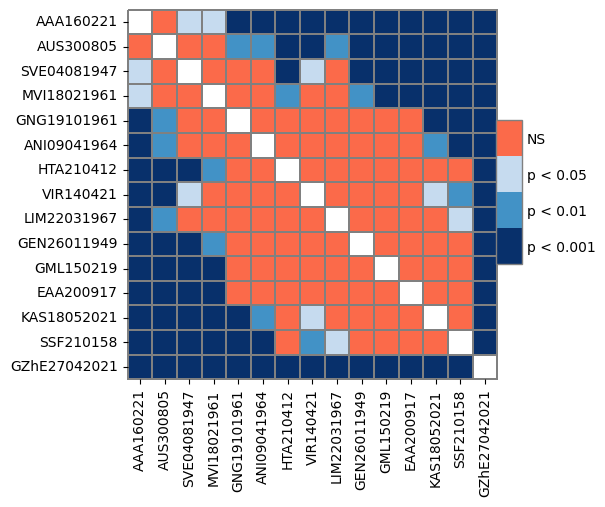

In [26]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_median', 
                            group_col='name', 
                            p_adjust='holm')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x286d534c0>)

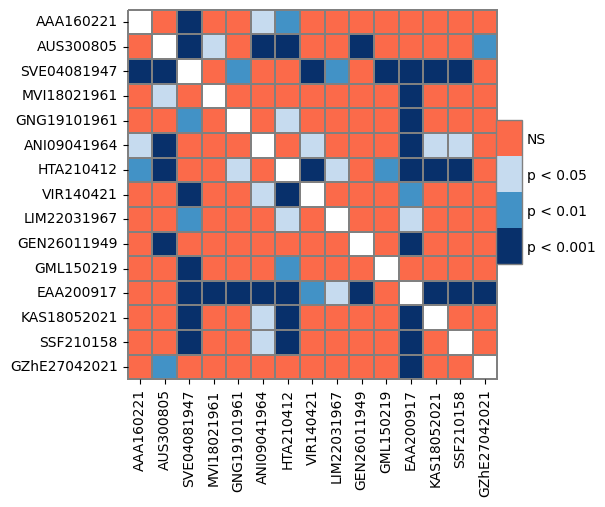

In [27]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='red_median', 
                            group_col='name', 
                            p_adjust='holm')
sp.sign_plot(pc, **heatmap_args)

In [28]:
data = [df.loc[ids, 'green_median'].values for ids in df.groupby('name').groups.values()]
H, p = ss.kruskal(*data)
p

5.83059167280875e-41

In [29]:
data = [df.loc[ids, 'red_median'].values for ids in df.groupby('name').groups.values()]
H, p = ss.kruskal(*data)
p

7.120322757402966e-23

In [30]:
lm = sfa.ols('green_median ~ C(zone)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

             df    sum_sq   mean_sq          F        PR(>F)
C(zone)     4.0  0.027276  0.006819  20.386473  1.657793e-15
Residual  472.0  0.157878  0.000334        NaN           NaN


           Ctrl  Normal  Pat2  Pat3  Pat4  AAA160221  CAA190121  SSD120121
Ctrl       -1.0     0.0   1.0   1.0   1.0        1.0        1.0        1.0
Normal      0.0    -1.0   1.0   2.0   1.0        1.0        1.0        2.0
Pat2        1.0     1.0  -1.0   0.0   0.0        0.0        0.0        0.0
Pat3        1.0     2.0   0.0  -1.0   0.0        0.0        0.0        0.0
Pat4        1.0     1.0   0.0   0.0  -1.0        0.0        0.0        0.0
AAA160221   1.0     1.0   0.0   0.0   0.0       -1.0        0.0        0.0
CAA190121   1.0     1.0   0.0   0.0   0.0        0.0       -1.0        0.0
SSD120121   1.0     2.0   0.0   0.0   0.0        0.0        0.0       -1.0
-----------


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x13ec27160>)

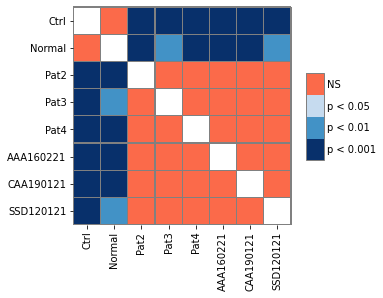

In [15]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='delta_green', 
                            group_col='name', 
                            p_adjust= 'Holm')
sp.sign_plot(pc, **heatmap_args)

           Ctrl  Normal  Pat2  Pat3  Pat4  AAA160221  CAA190121  SSD120121
Ctrl       -1.0     0.0   1.0   2.0   1.0        1.0        1.0        1.0
Normal      0.0    -1.0   1.0   0.0   2.0        3.0        1.0        0.0
Pat2        1.0     1.0  -1.0   0.0   0.0        0.0        0.0        0.0
Pat3        2.0     0.0   0.0  -1.0   0.0        0.0        0.0        0.0
Pat4        1.0     2.0   0.0   0.0  -1.0        0.0        0.0        0.0
AAA160221   1.0     3.0   0.0   0.0   0.0       -1.0        0.0        0.0
CAA190121   1.0     1.0   0.0   0.0   0.0        0.0       -1.0        0.0
SSD120121   1.0     0.0   0.0   0.0   0.0        0.0        0.0       -1.0
-----------


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x13fe372b0>)

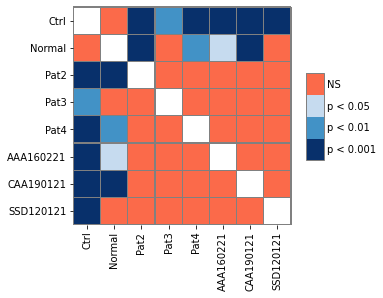

In [38]:
pc = sp.posthoc_scheffe(df, sort=False,
                            val_col='delta_green', 
                            group_col='name', 
                            p_adjust= 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

           Ctrl  Normal  Pat2  Pat3  Pat4  AAA160221  CAA190121  SSD120121
Ctrl       -1.0     1.0   1.0   1.0   1.0        1.0        1.0        1.0
Normal      1.0    -1.0   1.0   1.0   1.0        1.0        1.0        0.0
Pat2        1.0     1.0  -1.0   2.0   0.0        0.0        0.0        0.0
Pat3        1.0     1.0   2.0  -1.0   3.0        3.0        3.0        0.0
Pat4        1.0     1.0   0.0   3.0  -1.0        0.0        0.0        0.0
AAA160221   1.0     1.0   0.0   3.0   0.0       -1.0        0.0        0.0
CAA190121   1.0     1.0   0.0   3.0   0.0        0.0       -1.0        0.0
SSD120121   1.0     0.0   0.0   0.0   0.0        0.0        0.0       -1.0
-----------


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x13fed1cd0>)

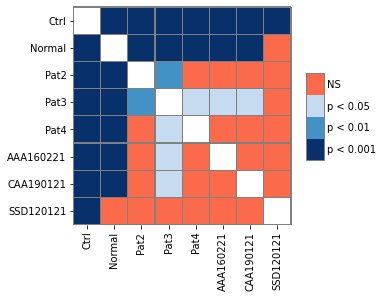

In [39]:
pc = sp.posthoc_mannwhitney(df, sort=False,
                            val_col='delta_green', 
                            group_col='name')
sp.sign_plot(pc, **heatmap_args)

In [ ]:
"""
`bonferroni` : one-step correction
`sidak` : one-step correction
`holm-sidak` : step down method using Sidak adjustments
`holm` : step-down method using Bonferroni adjustments
`simes-hochberg` : step-up method  (independent)
`hommel` : closed method based on Simes tests (non-negative)
`fdr_bh` : Benjamini/Hochberg  (non-negative)
`fdr_by` : Benjamini/Yekutieli (negative)
`fdr_tsbh` : two stage fdr correction (non-negative)
`fdr_tsbky` : two stage fdr correction (non-negative)
"""
# https://github.com/maximtrp/scikit-posthocs

### Parametric pairwise multiple comparisons tests:
# Student T test.
# Scheffe test.
# Tamhane T2 test.
# TukeyHSD test.

### Non-parametric tests for factorial design:
# Wilcoxon test.
# Mann-Whitney test.
# Conover test.
# Dunn test.
# Dwass, Steel, Critchlow, and Fligner test.
# Nashimoto and Wright (NPM) test.
# Nemenyi test.
# van Waerden test.

### Non-parametric tests for block design:
# Conover test.
# Durbin and Conover test.
# Miller test.
# Nemenyi test.
# Quade test.
# Siegel test.
# sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')